In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Reviews.csv')

# **Data Preprocessing**

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
# Drop rows with any null values
df.dropna(inplace=True)

In [18]:
# prompt: keep only two columns in dataset: 'ProductId','Text'

df = df[['ProductId', 'Text']]
df.head()


,ProductId,Text
0,B001E4KFG0,I have bought several of the Vitality canned d...
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,This is a confection that has been around a fe...
3,B000UA0QIQ,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...


In [19]:
df.shape

(568401, 2)

In [20]:
#  vader score calculation

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'Text' column
df['Sentiment'] = df['Text'].apply(analyze_sentiment)

# Display the DataFrame with sentiment analysis results
df.head()

,ProductId,Text,Sentiment
0,B001E4KFG0,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,If you are looking for the secret ingredient i...,Positive
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...,Positive


In [ ]:


def encode_sentiment(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return 0
    else:
        return 0 # or another suitable value for neutral sentiment

df['Encoded_Sentiment'] = df['Sentiment'].apply(encode_sentiment)
df.head()

# **Data Visualization**

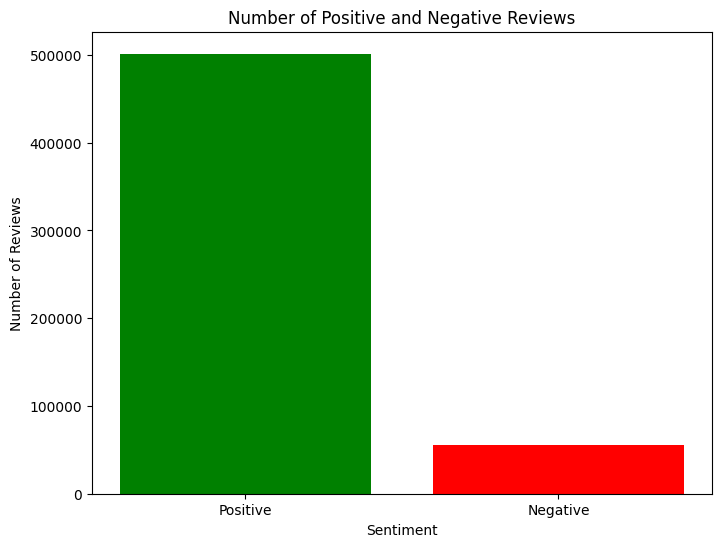

In [22]:
#  visualization for number of positive reviews and number of negative reviews

import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive'].shape[0]
negative_reviews = df[df['Sentiment'] == 'Negative'].shape[0]

# Create a bar chart
sentiment_counts = pd.DataFrame({'Sentiment': ['Positive', 'Negative'], 'Count': [positive_reviews, negative_reviews]})
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts['Sentiment'], sentiment_counts['Count'], color=['green', 'red'])
plt.title('Number of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

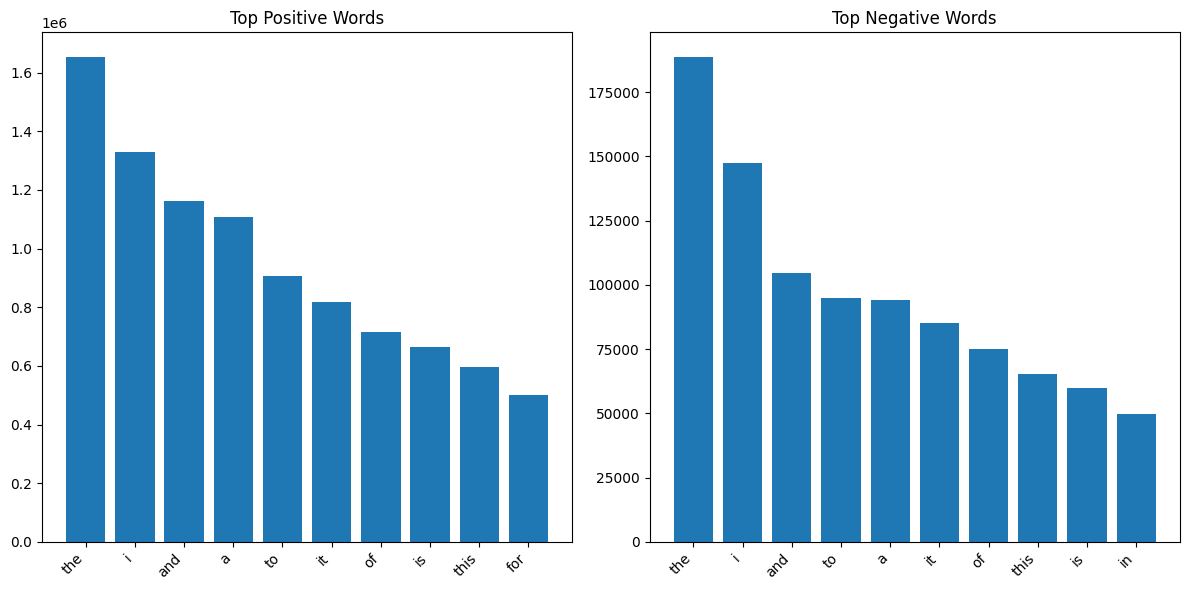

In [23]:
# bag of words for postive sentiment and similarly for negative sentiment

from collections import Counter

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Text']
negative_reviews = df[df['Sentiment'] == 'Negative']['Text']

# Function to preprocess text (you might need to adjust this based on your data)
import re
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess and create bag-of-words for positive reviews
positive_words = []
for review in positive_reviews:
    processed_review = preprocess_text(review)
    positive_words.extend(processed_review.split())

positive_word_counts = Counter(positive_words)

# Preprocess and create bag-of-words for negative reviews
negative_words = []
for review in negative_reviews:
    processed_review = preprocess_text(review)
    negative_words.extend(processed_review.split())
negative_word_counts = Counter(negative_words)

# Visualize the top N frequent words for each sentiment
import matplotlib.pyplot as plt

N = 10  # Number of top words to display

plt.figure(figsize=(12, 6))

# Plot positive words
plt.subplot(1, 2, 1)
positive_top_words = positive_word_counts.most_common(N)
words, counts = zip(*positive_top_words)
plt.bar(words, counts)
plt.title('Top Positive Words')
plt.xticks(rotation=45, ha='right')

# Plot negative words
plt.subplot(1, 2, 2)
negative_top_words = negative_word_counts.most_common(N)
words, counts = zip(*negative_top_words)
plt.bar(words, counts)
plt.title('Top Negative Words')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# **Model Building**

In [ ]:
# ensemble model to classify the sentiment

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Prepare the data
X = df['Text']
y = df['Encoded_Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9296188457174022
Naive Bayes Accuracy: 0.8819239802605536


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0, 1) # Set y-axis limit to 0-1 for accuracy
plt.show()